In [1]:
import pyfiglet
from pyfiglet import Figlet

f = Figlet(font='slant')

def print_figlet(text):
    print(f.renderText(text))

print_figlet('Hello, Mr Mokkarala !')

    __  __     ____           __  ___    
   / / / /__  / / /___       /  |/  /____
  / /_/ / _ \/ / / __ \     / /|_/ / ___/
 / __  /  __/ / / /_/ /    / /  / / /    
/_/ /_/\___/_/_/\____( )  /_/  /_/_/     
                     |/                  
    __  ___      __   __                    __         __
   /  |/  /___  / /__/ /______ __________ _/ /___ _   / /
  / /|_/ / __ \/ //_/ //_/ __ `/ ___/ __ `/ / __ `/  / / 
 / /  / / /_/ / ,< / ,< / /_/ / /  / /_/ / / /_/ /  /_/  
/_/  /_/\____/_/|_/_/|_|\__,_/_/   \__,_/_/\__,_/  (_)   
                                                         



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import keras
from keras.layers import Dropout
# Load data
data = pd.read_excel('VIJ-VIZ-TIR.xlsx', sheet_name=2)

# Assuming 'totalx' is the target variable to be predicted
target_variable = 'totalx'

# Filter data for the relevant months (3, 4, 5)
filtered_data = data[data['month'].isin([3, 4, 5])]

# Select features and target variable
features = ['d2m', 'blh', 'cp', 'cin']
X = filtered_data[features].values
y = filtered_data[target_variable].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM
n_steps = 3
X_lstm = np.array([X[i - n_steps:i, :] for i in range(n_steps, len(X))])
y_lstm = y[n_steps:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])


# Save the best model during training
checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[checkpoint], verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')

# Save the final model
model.save('final_lstm_model.h5')


Epoch 1/150


2024-02-17 12:05:55.150147: I external/local_xla/xla/service/service.cc:168] XLA service 0x7effd95e0e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 12:05:55.150200: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-17 12:05:55.159188: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 12:05:55.179809: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708151755.262782    6574 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/34 [===========================>..] - ETA: 0s - loss: 1708.3611 - mae: 41.0104
Epoch 1: val_loss improved from inf to 1083.19690, saving model to best_lstm_model.h5
34/34 [==============================] - 5s 30ms/step - loss: 1678.9358 - mae: 40.6102 - val_loss: 1083.1969 - val_mae: 31.3423
Epoch 2/150
 8/34 [======>.......................] - ETA: 0s - loss: 782.0172 - mae: 25.6990 

/home/fitzingout/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - ETA: 0s - loss: 370.2493 - mae: 14.9451
Epoch 2: val_loss improved from 1083.19690 to 173.65326, saving model to best_lstm_model.h5
34/34 [==============================] - 1s 20ms/step - loss: 370.2493 - mae: 14.9451 - val_loss: 173.6533 - val_mae: 8.6144
Epoch 3/150
34/34 [==============================] - ETA: 0s - loss: 91.0298 - mae: 7.3126
Epoch 3: val_loss improved from 173.65326 to 72.73497, saving model to best_lstm_model.h5
34/34 [==============================] - 1s 23ms/step - loss: 91.0298 - mae: 7.3126 - val_loss: 72.7350 - val_mae: 6.0112
Epoch 4/150
34/34 [==============================] - ETA: 0s - loss: 61.5805 - mae: 6.1062
Epoch 4: val_loss improved from 72.73497 to 49.59475, saving model to best_lstm_model.h5
34/34 [==============================] - 1s 22ms/step - loss: 61.5805 - mae: 6.1062 - val_loss: 49.5947 - val_mae: 5.1048
Epoch 5/150
33/34 [============================>.] - ETA: 0s - loss: 49.1851 - mae: 5.5729
Epoch 

In [6]:
# New input data
new_d2m = 296.907
new_blh = 461.283
new_cp = 0.0000363533
new_cin = 202.997

# Create an array with the new input data
new_input_data = np.array([[new_d2m, new_blh, new_cp, new_cin]])

# Standardize the new input data using the same scaler used for training data
new_input_data_scaled = scaler.transform(new_input_data)

# Reshape the new input data for LSTM
new_input_data_lstm = np.array([new_input_data_scaled[0, :]] * n_steps)
new_input_data_lstm = new_input_data_lstm.reshape((1, n_steps, len(features)))

# Make predictions with the trained model
predicted_output = model.predict(new_input_data_lstm)

print(f'Predicted Output: {predicted_output[0, 0]}')


1/1 [==============================] - 0s 189ms/step
Predicted Output: 43.069664001464844


22/22 [==============================] - 0s 6ms/step
Mean Squared Error: 19.7434
Mean Absolute Error: 3.3429
R^2: 0.1601


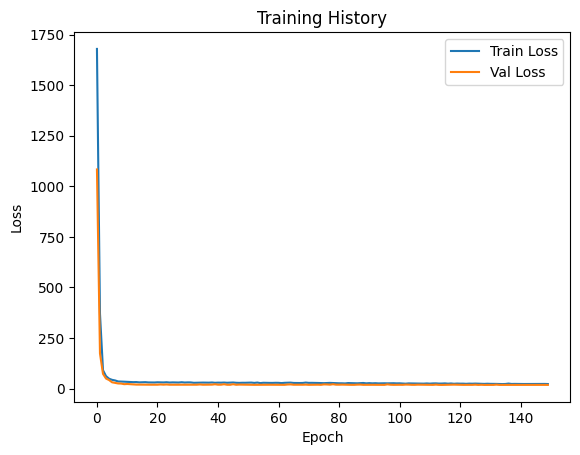

In [7]:
#error calculation
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2: {r2:.4f}')


# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


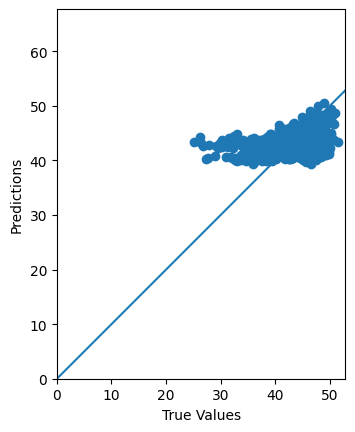

In [8]:
#scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()



In [18]:
#now lets make a new excel file and there we will put the predicted values input and the actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.to_excel('predictedtirupati_Lstm.xlsx', index=False)
print(df)


      Actual  Predicted
0    48.3623  46.888393
1    44.3281  43.229424
2    49.8896  40.940777
3    38.9720  42.428402
4    41.1313  43.481316
..       ...        ...
672  47.0852  42.616142
673  37.5029  40.457691
674  41.9176  43.157387
675  44.9952  41.798618
676  43.8867  42.026627

[677 rows x 2 columns]
